In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [63]:
heart = pd.read_csv('/heart failur classification dataset.csv',index_col=0)
heart.head(3)



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1


In [46]:
heart.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [47]:
heart = heart.dropna(axis = 0, subset = ['serum_sodium'])

print("Shape after removing null values: ", heart.shape)

Shape after removing null values:  (293, 13)


In [48]:
print("Death_EVENT:\n", heart['DEATH_EVENT'])

Death_EVENT:
 1      1
2      1
3      1
4      1
5      1
      ..
293    0
294    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 293, dtype: int64


In [49]:
heart = heart.drop(['time'], axis = 1)

heart.shape

(293, 12)

In [50]:
heart['sex']=heart['sex'].map({'Male':1,'Female':0})

In [51]:
heart['smoking']=heart['smoking'].map({'No':0,'Yes':1})

In [52]:
X = heart.iloc[:, :-1]
y = heart.iloc[:, -1]

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
heart.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.0,1,0,1


In [64]:
heart.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                          object
smoking                      object
time                        float64
DEATH_EVENT                   int64
dtype: object

In [65]:
heart['anaemia'] = heart.anaemia.astype(float)

In [76]:
heart['creatinine_phosphokinase'] = heart.creatinine_phosphokinase.astype(float)
heart['diabetes'] = heart.diabetes.astype(float)
heart['ejection_fraction'] = heart.ejection_fraction.astype(float)
heart['high_blood_pressure'] = heart.high_blood_pressure.astype(float)
heart["sex"] = pd.to_numeric(heart.sex, errors='coerce')
heart["smoking"] = pd.to_numeric(heart.smoking, errors='coerce')

In [80]:
heart.dtypes


age                         float64
anaemia                     float64
creatinine_phosphokinase    float64
diabetes                    float64
ejection_fraction           float64
high_blood_pressure         float64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                         float64
smoking                     float64
time                        float64
DEATH_EVENT                   int64
dtype: object

In [82]:
model = LogisticRegression()
model.fit(x_train, y_train) 
predictions = model.predict(x_test)
print(predictions)

[1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [102]:
score1=accuracy_score(y_test, predictions)
print( score1)

0.6440677966101694


In [103]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.7796610169491526


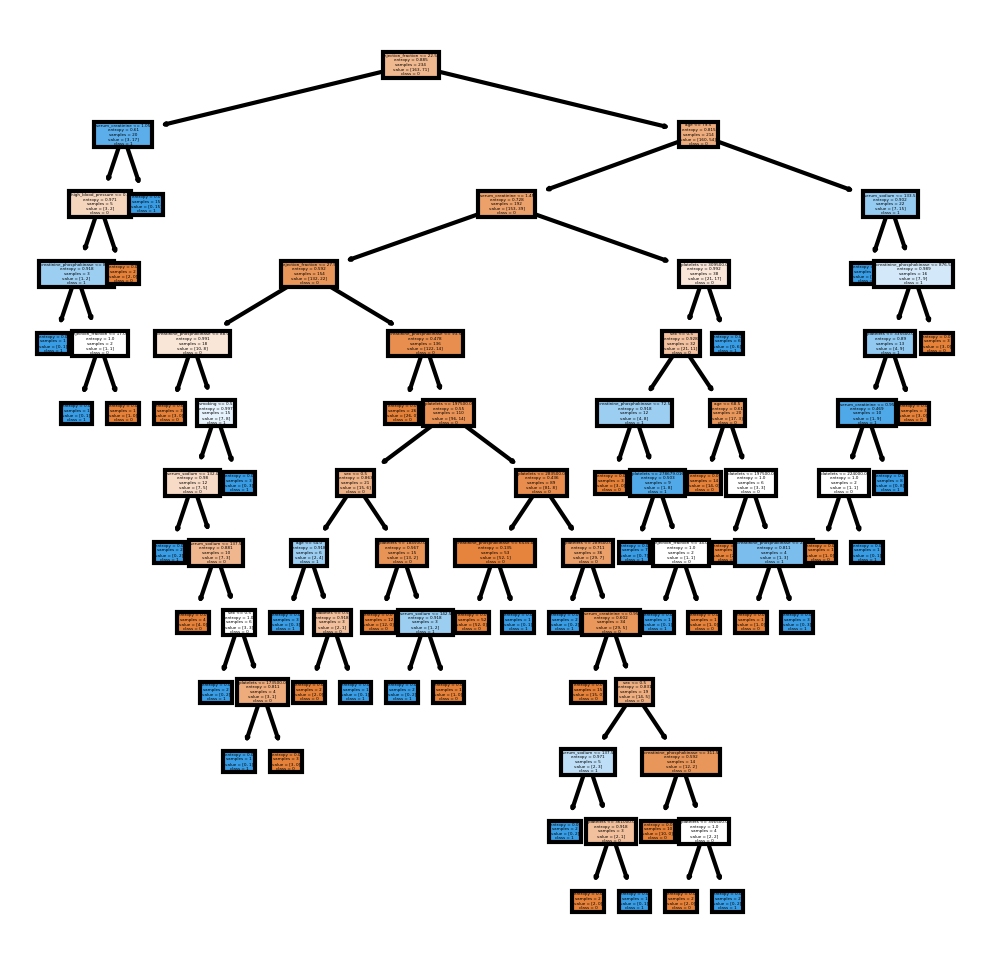

In [101]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = X.columns, 
               class_names=['0','1'],
               filled = True);

In [108]:
import matplotlib.pyplot as plt

<BarContainer object of 1 artists>

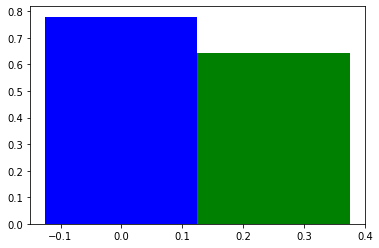

In [111]:
data = [[score],[score1]]
X = np.arange(1)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)
  